# Ch 2. 監督式學習：迴歸
## 2-1. 線性迴歸
[2-1-1. 簡單線性迴歸](#sec2_1_1)  
[2-1-2. 多元線性迴歸](#sec2_1_2)
## 2-2. 評估迴歸模型的效能
[2-2-1. 評估指標](#sec2_2_1)  
[2-2-2. 殘差分析](#sec2_2_2)
***

<a id='sec2_1_1'></a>
## 2-1-1. 簡單線性迴歸

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

house = load_boston()
df = pd.DataFrame(data=house.data, 
                  columns=house.feature_names)
df['MEDV'] = house.target
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [2]:
# 敘述性統計
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
# 檢查是否有遺漏值(也可用 df.info())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

w_1 = [9.10210898]
w_0 = [-34.67062078]


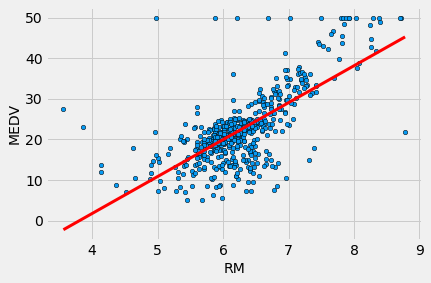

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('fivethirtyeight')

x, y = df.loc[:, ['RM']], df.loc[:, ['MEDV']]
lr = LinearRegression()
lr.fit(x, y)
print('w_1 =', lr.coef_[0])
print('w_0 =', lr.intercept_)

plt.scatter(x, y, facecolor='xkcd:azure', edgecolor='black', s=20)
plt.xlabel('RM', fontsize=14)
plt.ylabel("MEDV", fontsize=14)
# 繪製迴歸線
n_x = np.linspace(x.min(), x.max(), 100)
n_y = lr.intercept_ + lr.coef_[0] * n_x
plt.plot(n_x, n_y, color='r', lw=3);

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

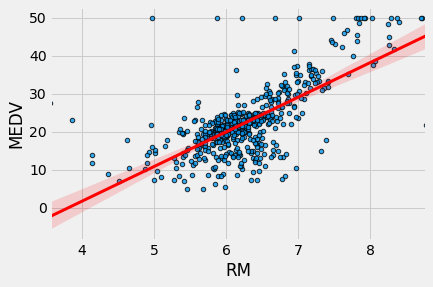

In [5]:
# 透過 seaborn 可更簡單地繪製迴歸線
import seaborn as sns

# 預設會在迴歸線旁繪製 95% 的信賴區間
sns.regplot(x='RM', y='MEDV', data=df, 
            scatter_kws={'facecolor':'xkcd:azure', 
                         'edgecolor':'black', 's':20},
            line_kws={'color':'r', 'lw':3})

w_1 = [0.69535995]
w_0 = [-4.43892061e-16]


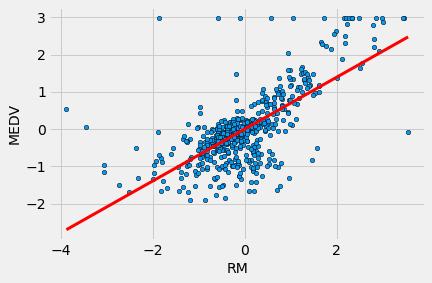

In [6]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)

lr = LinearRegression()
lr.fit(x, y)
print('w_1 =', lr.coef_[0])
print('w_0 =', lr.intercept_)

plt.scatter(x, y, facecolor='xkcd:azure', edgecolor='black', s=20)
plt.xlabel('RM', fontsize=14)
plt.ylabel("MEDV", fontsize=14)
# 繪製迴歸線
n_x = np.linspace(x.min(), x.max(), 100)
n_y = lr.intercept_ + lr.coef_[0] * n_x
plt.plot(n_x, n_y, color='r', lw=3)
plt.show()

<a id='sec2_1_2'></a>
## 2-1-2. 多元線性迴歸

In [7]:
from sklearn.linear_model import LinearRegression

X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]
lr = LinearRegression()
lr.fit(X, y)
print('[w_1, w_2] =', lr.coef_[0])
print('w_0 =', lr.intercept_)

[w_1, w_2] = [ 5.09478798 -0.64235833]
w_0 = [-1.35827281]


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = pd.DataFrame()
df_vif['feature'] = df.columns
df_vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
df_vif

,feature,VIF
0,CRIM,2.131404
1,ZN,2.910004
2,INDUS,14.485874
3,CHAS,1.176266
4,NOX,74.004269
5,RM,136.101743
6,AGE,21.398863
7,DIS,15.430455
8,RAD,15.369980
9,TAX,61.939713


In [9]:
# 新增一行，用常數填充
df['constant'] = 1
df_vif = pd.DataFrame()
df_vif['feature'] = df.columns
df_vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
# 移除新增的行
df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

,feature,VIF
0,CRIM,1.831537
1,ZN,2.352186
2,INDUS,3.992503
3,CHAS,1.095223
4,NOX,4.586920
5,RM,2.260374
6,AGE,3.100843
7,DIS,4.396007
8,RAD,7.808198
9,TAX,9.205542


In [10]:
# 新增一行，用常數填充
df['constant'] = 1
df1 = df.drop('TAX', axis=1) # 移除 TAX 
df_vif = pd.DataFrame()
df_vif['feature'] = df1.columns
df_vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
# 移除新增的行
df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

,feature,VIF
0,CRIM,1.829538
1,ZN,2.216337
2,INDUS,3.235660
3,CHAS,1.084627
4,NOX,4.578751
5,RM,2.260029
6,AGE,3.098057
7,DIS,4.392557
8,RAD,2.898743
9,PTRATIO,1.991741


In [11]:
# 新增一行，用常數填充
df['constant'] = 1
df['new_DIS'] = np.log(df['RAD'])
df['new_TAX'] = np.log(df['TAX'])
df1 = df.drop(['TAX', 'RAD'], axis=1)
df_vif = pd.DataFrame()
df_vif['feature'] = df1.columns
df_vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
df_vif

,feature,VIF
0,CRIM,1.715444
1,ZN,2.370558
2,INDUS,3.750080
3,CHAS,1.092504
4,NOX,4.547445
5,RM,2.249681
6,AGE,3.094001
7,DIS,4.401220
8,PTRATIO,1.853978
9,B,1.372018


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
components = pca.fit_transform(df)
df_comp = pd.DataFrame(data=components,
                       columns=list('12345678'))
vif = pd.DataFrame()
vif["feature"] = df_comp.columns
vif["VIF"] = [variance_inflation_factor(df_comp.values, i) for i in range(df_comp.shape[1])]
vif

,feature,VIF
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,8,1.0


In [13]:
import statsmodels.api as sm

X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]
X = sm.add_constant(X)  # 增加常數行作為截距項
model = sm.OLS(y, X)
result = model.fit()
print('迴歸係數：', result.params)
result.summary()

迴歸係數： const   -1.358273
RM       5.094788
LSTAT   -0.642358
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          7.01e-112
Time:                        16:14:39   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2-2. 評估迴歸模型的效能
<a id='sec2_2_1'></a>
### 2-1-1. 評估指標

In [14]:
from sklearn.model_selection import train_test_split

X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


In [15]:
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('MSE(training): %.3f, MSE(testing): %.3f' %( 
    mean_squared_error(y_train, y_train_pred), 
    mean_squared_error(y_test, y_test_pred)))

MSE(training): 28.790, MSE(testing): 37.383


In [16]:
from sklearn.metrics import r2_score

print('R^2(training): %.3f, R^2(testing): %.3f' %( 
    r2_score(y_train, y_train_pred), 
    r2_score(y_test, y_test_pred)))

R^2(training): 0.662, R^2(testing): 0.541


In [17]:
# 1.增加自變數
# 隨機增加無關的 4 個特徵(數值介於 0~1 之間)
np.random.seed(0)
rand_n = np.random.rand(X.shape[0], 4)
df_rand = pd.DataFrame(data=rand_n, 
                       columns=list('ABCD'))
X = pd.concat([X, df_rand], axis=1)

def linReg_R2(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2,
                                                        random_state=0)
    lr = LinearRegression().fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    print('R^2(training): %.3f, R^2(testing): %.3f' %( 
        r2_score(y_train, y_train_pred), 
        r2_score(y_test, y_test_pred)))

print(X.shape)
print('=== 1.隨機增加無關的 4 個特徵 ===')
linReg_R2(X, y)

(506, 6)
=== 1.隨機增加無關的 4 個特徵 ===
R^2(training): 0.663, R^2(testing): 0.542


In [18]:
# 2.擴大數據點的分布範圍
X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]
X.loc[len(X)] = [50, 100]
y.loc[len(y)] = [200]

print(X.shape)
print('=== 2.增加 1 筆數據 ===')
linReg_R2(X, y)

(507, 2)
=== 2.增加 1 筆數據 ===
R^2(training): 0.658, R^2(testing): 0.906


In [19]:
# 3.減少樣本數
X_y = df.loc[:, ['RM','LSTAT', 'MEDV']]
df_group = X_y.groupby(['MEDV'])

lst = []
for name, _ in df_group:
    lst.append(df_group.get_group(name).mean().tolist())

df_new = pd.DataFrame(data=lst, columns=['RM','LSTAT', 'MEDV'])
X, y = df_new.loc[:, ['RM','LSTAT']], df_new.loc[:, ['MEDV']]

print(df_new.shape)
print('=== 3.減少樣本數 ===')
linReg_R2(X, y)

(229, 3)
=== 3.減少樣本數 ===
R^2(training): 0.827, R^2(testing): 0.872


In [20]:
# 利用公式計算 Adj. R^2
def adj_R2(r2, n, k):
    return 1 - (n-1)*(1-r2)/(n-k-1)

def linReg_adj_R2(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2,
                                                        random_state=0)
    lr = LinearRegression().fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print('Adj. R^2(training): %.3f, Adj. R^2(testing): %.3f' %( 
        adj_R2(r2_train, X_train.shape[0], X_train.shape[1]), 
        adj_R2(r2_test, X_test.shape[0], X_test.shape[1])))
    
X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]

print(X.shape)
print('=== 原始數據 ===')
linReg_adj_R2(X, y)

np.random.seed(0)
rand_n = np.random.rand(X.shape[0], 4)
df_rand = pd.DataFrame(data=rand_n, 
                       columns=list('ABCD'))
X = pd.concat([X, df_rand], axis=1)

print(X.shape)
print('=== 隨機增加無關的 4 個特徵 ===')
linReg_adj_R2(X, y)

(506, 2)
=== 原始數據 ===
Adj. R^2(training): 0.660, Adj. R^2(testing): 0.532
(506, 6)
=== 隨機增加無關的 4 個特徵 ===
Adj. R^2(training): 0.658, Adj. R^2(testing): 0.513


<a id='sec2_2_2'></a>
### 2-2-1. 殘差分析
#### Shapiro-Wilk 檢定(SW test)

In [21]:
import statsmodels.api as sm
from scipy.stats import shapiro

X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]
X = sm.add_constant(X)  # 增加常數行作為截距項
model = sm.OLS(y, X).fit()

# Shapiro-Wilk 常態性檢定
stat, p = shapiro(model.resid)
print('Statistics: %.3f, p-value: %.3f' % (stat, p))
alpha = 0.05

if p > alpha:
    print('看起來是常態分布（無法拒絕H0）')
else:
    print('看起來不是常態分布（拒絕H0）')

Statistics: 0.910, p-value: 0.000
看起來不是常態分布（拒絕H0）


#### Kolmogorov-Smirnov 檢定(KS test)

In [22]:
from scipy.stats import kstest

# Kolmogorov-Smirnov 常態性檢定
stat, p = kstest(model.resid, 'norm')
print('Statistics: %.3f, p-value: %.3f' % (stat, p))
alpha = 0.05

if p > alpha:
    print('看起來是常態分布（無法拒絕H0）')
else:
    print('看起來不是常態分布（拒絕H0）')

Statistics: 0.379, p-value: 0.000
看起來不是常態分布（拒絕H0）


#### D’Agostino-Pearson omnibus 檢定

In [23]:
from scipy.stats import normaltest

# D’Agostino-Pearson omnibus 常態性檢定
stat, p = normaltest(model.resid)
print('Statistics: %.3f, p-value: %.3f' % (stat, p))
alpha = 0.05

if p > alpha:
    print('看起來是常態分布（無法拒絕H0）')
else:
    print('看起來不是常態分布（拒絕H0）')

Statistics: 145.712, p-value: 0.000
看起來不是常態分布（拒絕H0）


#### Jarque-Bera 檢定(JB test))

In [24]:
from scipy.stats import jarque_bera

# Jarque-Bera 常態性檢定
stat, p = jarque_bera(model.resid)
print('Statistics: %.3f, p-value: %.3f' % (stat, p))
alpha = 0.05

if p > alpha:
    print('看起來是常態分布（無法拒絕H0）')
else:
    print('看起來不是常態分布（拒絕H0）')

Statistics: 457.690, p-value: 0.000
看起來不是常態分布（拒絕H0）


#### QQ 圖

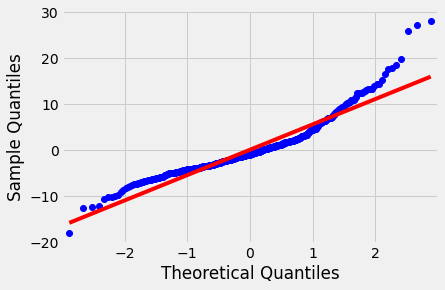

In [25]:
from statsmodels.graphics.gofplots import qqplot

qqplot(model.resid, line='s');

In [26]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print('dw: %.3f' % dw)

if 2 <= dw <= 4:
    print('誤差項獨立')
elif 0 <= dw < 2:
    print('誤差項不獨立')
else:
    print('計算錯誤')

dw: 0.834
誤差項不獨立


Text(0, 0.5, 'Residual (standardization)')

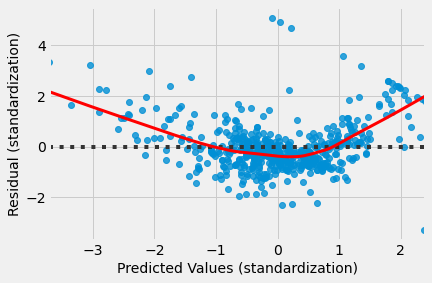

In [27]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df_resid = pd.DataFrame()
df_resid['y_pred'] = model.predict(X)
df_resid['resid'] = model.resid
df_resid = StandardScaler().fit_transform(df_resid)

kws = {'color':'red', 'lw':3}
sns.residplot(x=df_resid[:, 0], y=df_resid[:, 1], 
              lowess=True, line_kws=kws)
plt.xlabel('Predicted Values (standardization)', fontsize=14)
plt.ylabel('Residual (standardization)', fontsize=14)